### TRABAJO:

##### Genere un programa que realice una transformada proyectiva u homografía de una imagen tomada en diagonal. La imagen debe mostrare de manera frontal.

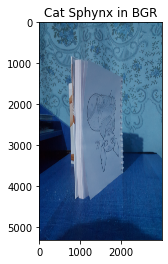

Tamaño de Real de imagen 5312 x 2988


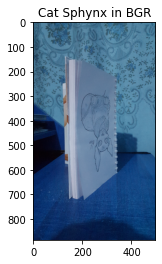

Tamaño de imagen escalada: 885 x 498


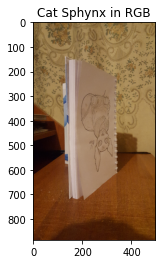

Tamaño de imagen escalada: 885 x 498


<ipython-input-1-32a52547217d>:44: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.line(img_rgb_lines, tuple(pts[0]), tuple(pts[1]), (0,0,255), 2)
<ipython-input-1-32a52547217d>:45: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.line(img_rgb_lines, tuple(pts[1]), tuple(pts[3]), (0,0,255), 2)
<ipython-input-1-32a52547217d>:46: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.line(img_rgb_lines, tuple(pts[3]), tuple(pts[2]), (0,0,255), 2)
<ipython-input-1-32a52547217d>:47: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using

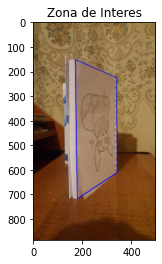

<ipython-input-1-32a52547217d>:68: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.line(img_rgb_lines2, tuple(pts2[0]), tuple(pts2[1]), (0,255,0), 2)
<ipython-input-1-32a52547217d>:69: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.line(img_rgb_lines2, tuple(pts2[1]), tuple(pts2[3]), (0,255,0), 2)
<ipython-input-1-32a52547217d>:70: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.line(img_rgb_lines2, tuple(pts2[3]), tuple(pts2[2]), (0,255,0), 2)
<ipython-input-1-32a52547217d>:71: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integ

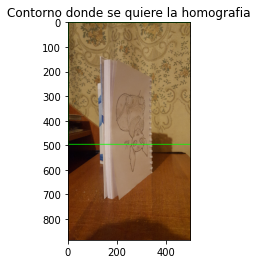

Matriz perspectiva
[[-5.00406322e-01  1.13277509e+00 -8.58619854e+01]
 [ 1.50309570e+00 -2.13344696e-02 -2.53036177e+02]
 [-1.43202266e-03 -3.14222448e-05  1.00000000e+00]]


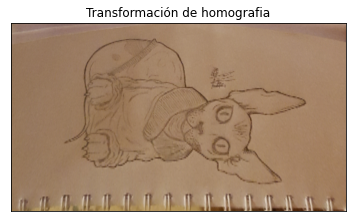

Tamaño de imagen transformada: 498 x 885
Ahora mi imagen con homografia es la siguiente


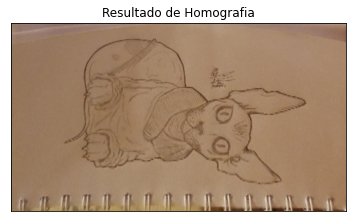

Tamaño de imagen original: 498 x 885
Ahora se procedera a rotar la imagen


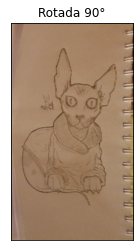

Tamaño de imagen escalada: 885 x 498


In [1]:
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#------------------------------------------------------------------------
imagen = cv2.imread('dibujo.jpg')
#------------------------------------------------------------------------
plt.figure()
plt.title('Cat Sphynx in BGR')
plt.imshow(imagen)
plt.show()
rows1,cols1,ch1 = imagen.shape
print("Tamaño de Real de imagen",rows1,"x",cols1)
#------------------------------------------------------------------------
scale = 6
img = cv2.resize(imagen, None,fx=1./scale, fy=1./scale, interpolation=cv2.INTER_LANCZOS4)
#------------------------------------------------------------------------
plt.figure()
plt.title('Cat Sphynx in BGR')
plt.imshow(img)
plt.show()
rows2,cols2,ch2 = img.shape
print("Tamaño de imagen escalada:",rows2,"x",cols2)
#------------------------------------------------------------------------
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title('Cat Sphynx in RGB')
plt.imshow(img_rgb)
plt.show()
rows,cols,ch = img_rgb.shape
print("Tamaño de imagen escalada:",rows,"x",cols)
#------------------------------------------------------------------------
rows, columns = img_rgb.shape[0:2] ####????
#rows = img.shape[0]
#cols = img.shape[1]
#------------------------------------------------------------------------
img_rgb_lines = img_rgb.copy()

pts = np.float32([ [171,152],[179,717],[339,226],[340,611] ])
cv2.line(img_rgb_lines, tuple(pts[0]), tuple(pts[1]), (0,0,255), 2)
cv2.line(img_rgb_lines, tuple(pts[1]), tuple(pts[3]), (0,0,255), 2)
cv2.line(img_rgb_lines, tuple(pts[3]), tuple(pts[2]), (0,0,255), 2)
cv2.line(img_rgb_lines, tuple(pts[2]), tuple(pts[0]), (0,0,255), 2)

plt.figure()
plt.title("Zona de Interes")
plt.imshow(img_rgb_lines);
plt.show()

nueva = cv2.cvtColor(img_rgb_lines, cv2.COLOR_BGR2RGB)

cv2.imshow('Imagen con zona de Interes', nueva)
cv2.waitKey()
cv2.destroyAllWindows()
#-----------------------------------------------------------------------
img_rgb_lines2 = img_rgb.copy()

#pts2 = np.float32([ [1,1],[1,883],[496,1],[496,883] ])
#pts2 = np.float32([ [496,1],[496,883],[1,1],[1,883] ])

pts2 = np.float32([ [1,1],[883,1],[1,496],[883,496] ])
#pts2 = np.float32([ [1,496],[883,496],[1,1],[883,1] ])

cv2.line(img_rgb_lines2, tuple(pts2[0]), tuple(pts2[1]), (0,255,0), 2)
cv2.line(img_rgb_lines2, tuple(pts2[1]), tuple(pts2[3]), (0,255,0), 2)
cv2.line(img_rgb_lines2, tuple(pts2[3]), tuple(pts2[2]), (0,255,0), 2)
cv2.line(img_rgb_lines2, tuple(pts2[2]), tuple(pts2[0]), (0,255,0), 2)

plt.figure()
plt.title("Contorno donde se quiere la homografia")
plt.imshow(img_rgb_lines2);
plt.show()

nueva1 = cv2.cvtColor(img_rgb_lines2, cv2.COLOR_BGR2RGB)

cv2.imshow('Imagen de contorno donde se quiere la homografia', nueva1)
cv2.waitKey()
cv2.destroyAllWindows()
#-----------------------------------------------------------------------
M = cv2.getPerspectiveTransform(pts, pts2)
print("Matriz perspectiva")
print(M)
#-----------------------------------------------------------------------
img_res = cv2.warpPerspective(img_rgb, M, (rows,columns))
plt.figure()
plt.title('Transformación de homografia')
plt.xticks([]), plt.yticks([])
plt.imshow(img_res)
plt.show()
rows,cols,ch = img_res.shape
print("Tamaño de imagen transformada:",rows,"x",cols)
#-----------------------------------------------------------------------
print("Ahora mi imagen con homografia es la siguiente")
plt.figure()
plt.title('Resultado de Homografia')
plt.xticks([]), plt.yticks([])
plt.imshow(img_res)
plt.show()
rows3,cols3,ch3 = img_res.shape
print("Tamaño de imagen original:",rows3,"x",cols3)
print("Ahora se procedera a rotar la imagen")

nueva2 = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)

cv2.imshow('Resultado de Homografia', nueva2)
cv2.waitKey()
cv2.destroyAllWindows()
#-----------------------------------------------------------------------
rows4, columns4 = img_res.shape[0:2]

MM = np.float32([[0,1,0],[-1,0,885],[0,0,1]])#90

##El valor de la imagen de salida se definió en 1024 x 512
rot = cv2.warpPerspective(img_res, MM, (rows4,columns4))
plt.figure()
plt.title('Rotada 90°')
plt.xticks([]), plt.yticks([])
plt.imshow(rot)
plt.show()
rows4,cols4,ch4 = rot.shape
print("Tamaño de imagen escalada:",rows4,"x",cols4)

nueva3 = cv2.cvtColor(rot, cv2.COLOR_BGR2RGB)

cv2.imshow('Resultado de Homografia', nueva3)
cv2.waitKey()
cv2.destroyAllWindows()